In [1]:
# Import All Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 

In [52]:
# Upload the CSV File in to Jupyter Note Book
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [53]:
# Check Data Shape
df.shape

(18249, 14)

In [54]:
# Check Columns
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [55]:
# Check Null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

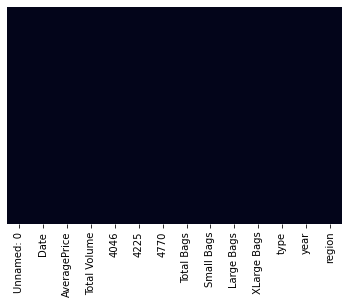

In [56]:
# To Check Null values Using Heatmap 
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [57]:
# Check Statistic Models
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [58]:
# Check Data Types
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [59]:
# Change the Month Format
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x :x.month)
df['Date']=df['Date'].apply(lambda x: x.day)

In [60]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [61]:
# Check Count in region
df['region'].value_counts()

NorthernNewEngland     338
GrandRapids            338
California             338
SouthCentral           338
Tampa                  338
StLouis                338
Jacksonville           338
Northeast              338
Pittsburgh             338
HarrisburgScranton     338
Chicago                338
Seattle                338
Spokane                338
BuffaloRochester       338
GreatLakes             338
Denver                 338
Sacramento             338
PhoenixTucson          338
NewYork                338
BaltimoreWashington    338
CincinnatiDayton       338
Midsouth               338
Houston                338
SanFrancisco           338
LasVegas               338
NewOrleansMobile       338
Portland               338
Roanoke                338
TotalUS                338
RichmondNorfolk        338
Philadelphia           338
SanDiego               338
MiamiFtLauderdale      338
Charlotte              338
DallasFtWorth          338
HartfordSpringfield    338
Boston                 338
N

In [62]:
df['region']=pd.get_dummies(df['region'])
df['region']

0        1
1        1
2        1
3        1
4        1
        ..
18244    0
18245    0
18246    0
18247    0
18248    0
Name: region, Length: 18249, dtype: uint8

In [63]:
# Check the Coorelation
df_cor=df.corr()
df_cor

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
Unnamed: 0,1.000000,-0.088097,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667,0.000040,-0.777730
Date,-0.088097,1.000000,0.027386,-0.009747,-0.010159,-0.012393,-0.009009,-0.004988,-0.003870,-0.008352,0.000319,0.004475,0.000002,0.010621
AveragePrice,-0.133008,0.027386,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.052899,0.162409
Total Volume,0.014035,-0.009747,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.031946,-0.024689
4046,0.017628,-0.010159,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.031622,-0.025803
4225,0.019829,-0.012393,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.029381,-0.022108
4770,0.041752,-0.009009,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.028989,-0.033424
Total Bags,-0.002219,-0.004988,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.032275,-0.022724
Small Bags,0.000347,-0.003870,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.032319,-0.023126
Large Bags,-0.009196,-0.008352,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.029948,-0.020187


<AxesSubplot:>

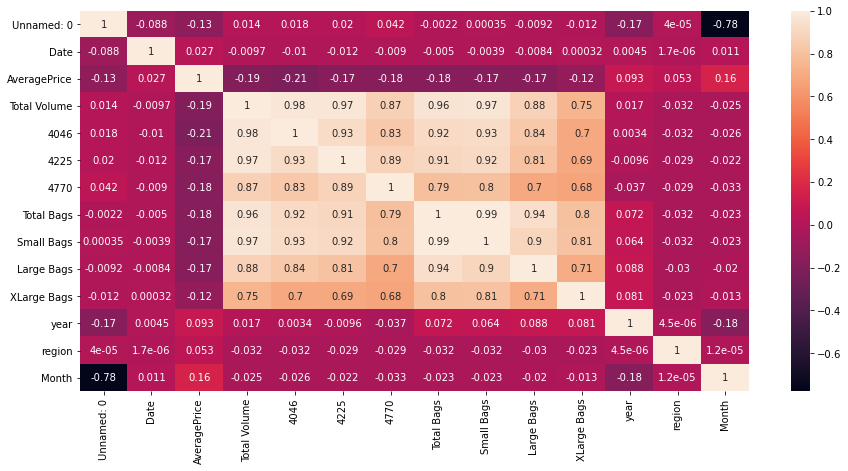

In [64]:
# Check Coorelation with Using heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df_cor,annot=True)

# EDA

<AxesSubplot:xlabel='AveragePrice'>

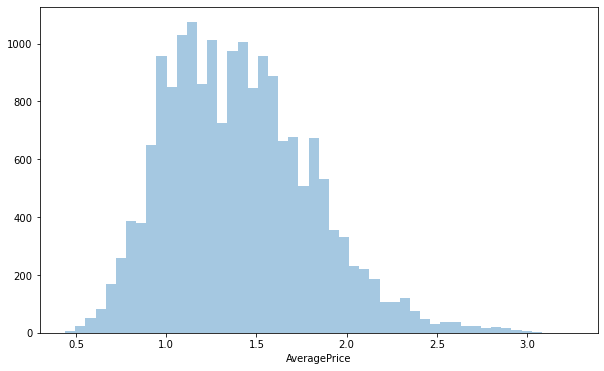

In [65]:
plt.figure(figsize=(10,6))

sns.distplot(df['AveragePrice'],kde=False)

Text(0.5, 1.0, 'Average Price & Region')

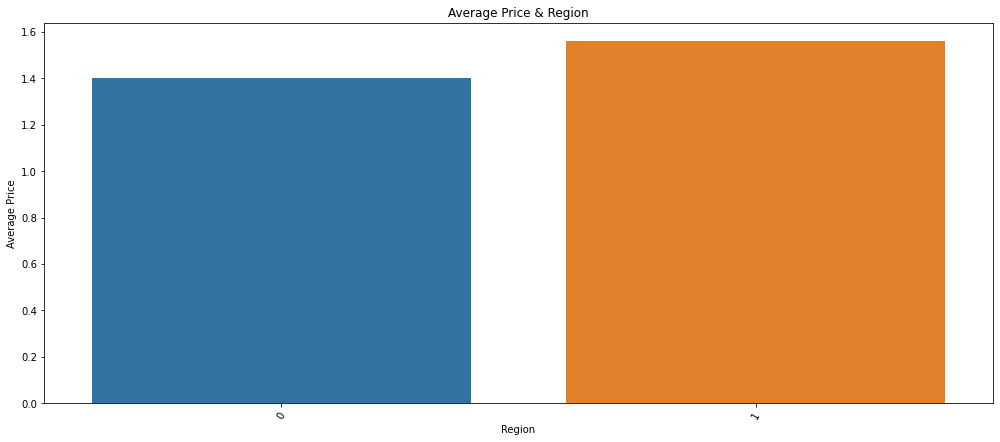

In [66]:
# Check Differnce between Average Price & Region by using with BarPlot
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(17,7))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=60)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price & Region')

Text(0.5, 1.0, 'Average of Total Volume VS Region')

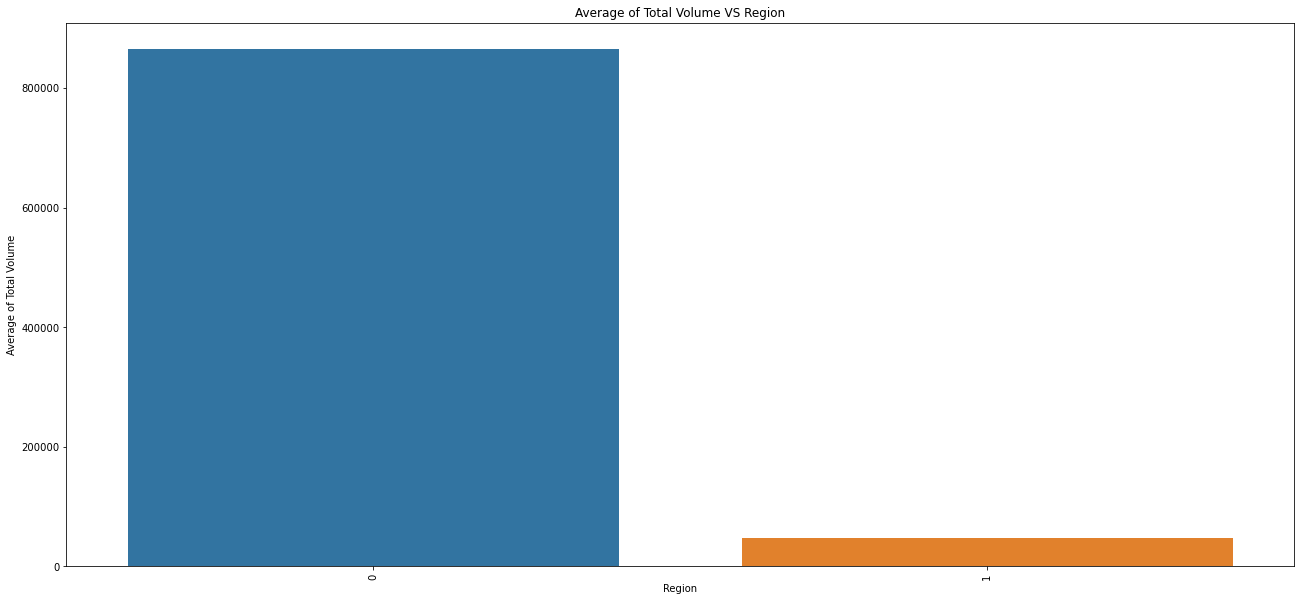

In [67]:
# Check Differnce between Average of Total Volume & Region by using with BarPlot
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume VS Region')

Text(0.5, 1.0, 'Average Price')

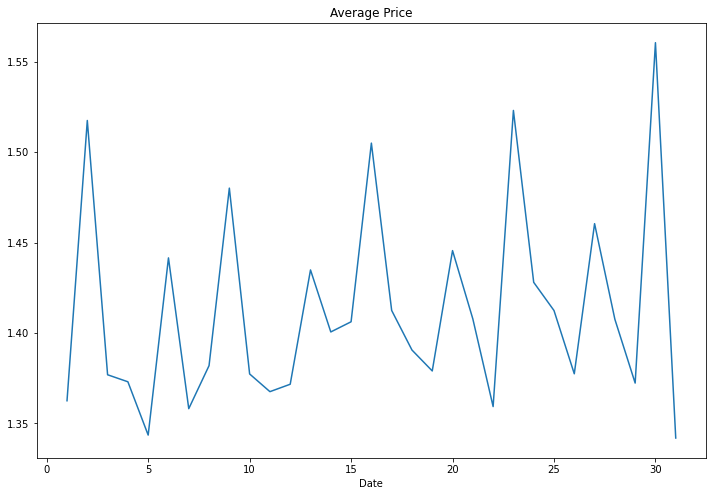

In [68]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

In [69]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,1,12
1,1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,1,12
2,2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,1,12
3,3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,1,12
4,4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,1,11


In [70]:
# Drop Type Column from our database
df=df.drop(['type'],axis=1)

In [71]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,1,12
1,1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,1,12
2,2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,1,12
3,3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,1,12
4,4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,1,11


In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder
for column in df.columns:
    if df[column].dtype==np.number:
        continue
        df[column]=le.fit_transform(df[column])
        
import warnings
warnings.filterwarnings('ignore')

In [73]:
df.dtypes

Unnamed: 0        int64
Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year              int64
region            uint8
Month             int64
dtype: object

In [74]:
df['AveragePrice']

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [75]:
X=df.drop(columns='AveragePrice')
X

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month
0,0,27,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,1,12
1,1,20,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,1,12
2,2,13,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,1,12
3,3,6,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,1,12
4,4,29,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,4,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,0,2
18245,8,28,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,0,1
18246,9,21,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,0,1
18247,10,14,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,0,1


In [76]:
y=df['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [77]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
print(X_train.shape,'\t\t',X_test.shape)

(14599, 13) 		 (3650, 13)


In [80]:
#Importing all model library
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor


#importing error metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [81]:
model = [LinearRegression(),Lasso(),Ridge(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),
         AdaBoostRegressor(),GradientBoostingRegressor(),ExtraTreesRegressor()]
for m in model:
    m.fit(X_train,y_train)
    score=m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Score of',m,'is:',score)
    print('MAE :',mean_absolute_error(y_test,predm))
    print('MSE :',mean_squared_error(y_test,predm))
    print('RMSE :',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2 Score :',r2_score(y_test,predm))
    print('********************************************************************')
    print('\n')

Score of LinearRegression() is: 0.09580093648826149
MAE : 0.3039223236474086
MSE : 0.1446848322128497
RMSE : 0.38037459459439416
R2 Score : 0.09948554367015205
********************************************************************


Score of Lasso() is: 0.0
MAE : 0.32249850646553946
MSE : 0.16070035526786625
RMSE : 0.4008744881728772
R2 Score : -0.00019463576641443048
********************************************************************


Score of Ridge() is: 0.09551174147382102
MAE : 0.3039909890446082
MSE : 0.14469954517251646
RMSE : 0.38039393419521883
R2 Score : 0.09939397060977884
********************************************************************


Score of SVR() is: 0.47391714251002026
MAE : 0.22609386369840714
MSE : 0.08849343793686
RMSE : 0.297478466341448
R2 Score : 0.44921925170955646
********************************************************************


Score of DecisionTreeRegressor() is: 1.0
MAE : 0.13808219178082193
MSE : 0.04622301369863013
RMSE : 0.2149953806448644
R2 Sc

In [82]:
from sklearn.ensemble import ExtraTreesRegressor
etr = RandomForestRegressor()
score=etr.fit(X_train,y_train)
pred=etr.predict(X_test)
print('Score of',m,'is:',score)
print('MAE :',mean_absolute_error(y_test,pred))
print('MSE :',mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score :',r2_score(y_test,pred))

Score of ExtraTreesRegressor() is: RandomForestRegressor()
MAE : 0.10151345205479449
MSE : 0.02140519622739725
RMSE : 0.14630514764490432
R2 Score : 0.8667746414842479
